In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [3]:
customer_survey_df=pd.read_csv("C:\\data\\work\\data\\customer_survey_new.csv")

In [4]:
customer_survey_df

,Customer ID,Customer Type,Personality,House Size,Key Desires,Future Plan,Main Activity,Budget,Preferred Style,Purchase Frequency,Recommendation Score,Customer Reviews,Suggested Products
0,1,Member,Practical,Large House,Durability,Work from home,Reading,Medium,Cozy,Monthly,42,0.37,"['Rustic Bookshelf', 'Adjustable Standing Desk']"
1,2,Member,Minimalist,Large House,Aesthetic,Travel,Reading,Medium,Modern,Rarely,59,-0.65,"['Storage Organizers', 'Outdoor Patio Chair']"
2,3,Normal,Minimalist,Medium House,Aesthetic,Work from home,Reading,High,Cozy,Rarely,36,0.99,"['Padded Dining Chair', 'Smart Office Desk']"
3,4,Member,Trendy,Large House,Comfort,Relax at home,Watching TV,Medium,Modern,Rarely,54,-0.01,"['Chaise Sofas', '2 Seater sofa']"
4,5,Member,Practical,Medium House,Aesthetic,Work from home,Watching TV,Medium,Minimalist,Monthly,27,0.69,"['Padded Dining Chair', 'Adjustable Standing D..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Normal,Trendy,Large House,Durability,Relax at home,Watching TV,Medium,Luxurious,Rarely,67,-0.14,"['Chaise Sofas', 'Rattan Armchair']"
96,97,Normal,Trendy,Large House,Aesthetic,Work from home,Watching TV,High,Luxurious,Occasionally,54,0.36,"['Padded Dining Chair', 'Adjustable Standing D..."
97,98,Member,Minimalist,Medium House,Durability,Move,Gaming,Medium,Modern,Monthly,85,-0.41,"['Compact Shoe Rack', 'Sliding Door Wardrobe']"
98,99,Normal,Practical,Large House,Comfort,Work from home,Gaming,High,Luxurious,Rarely,24,0.12,"['Adjustable Standing Desk', 'Smart Office Desk']"


In [5]:
column_list=(list(customer_survey_df))
print(column_list)

['Customer ID', 'Customer Type', 'Personality', 'House Size', 'Key Desires', 'Future Plan', 'Main Activity', 'Budget', 'Preferred Style', 'Purchase Frequency', 'Recommendation Score', 'Customer Reviews', 'Suggested Products']


In [6]:
#Observing the different types of data

print("=============================================")
print("Data types of the columns in the data frame:", customer_survey_df.dtypes)
print("=============================================")
print("Shape of the data frame:", customer_survey_df.shape)
print("=============================================")
print("Information about the data frame:", customer_survey_df.info())
customer_survey_df.head()

Data types of the columns in the data frame: Customer ID               int64
Customer Type            object
Personality              object
House Size               object
Key Desires              object
Future Plan              object
Main Activity            object
Budget                   object
Preferred Style          object
Purchase Frequency       object
Recommendation Score      int64
Customer Reviews        float64
Suggested Products       object
dtype: object
Shape of the data frame: (100, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer ID           100 non-null    int64  
 1   Customer Type         100 non-null    object 
 2   Personality           100 non-null    object 
 3   House Size            100 non-null    object 
 4   Key Desires           100 non-null    object 
 5   Future Plan           10

,Customer ID,Customer Type,Personality,House Size,Key Desires,Future Plan,Main Activity,Budget,Preferred Style,Purchase Frequency,Recommendation Score,Customer Reviews,Suggested Products
0,1,Member,Practical,Large House,Durability,Work from home,Reading,Medium,Cozy,Monthly,42,0.37,"['Rustic Bookshelf', 'Adjustable Standing Desk']"
1,2,Member,Minimalist,Large House,Aesthetic,Travel,Reading,Medium,Modern,Rarely,59,-0.65,"['Storage Organizers', 'Outdoor Patio Chair']"
2,3,Normal,Minimalist,Medium House,Aesthetic,Work from home,Reading,High,Cozy,Rarely,36,0.99,"['Padded Dining Chair', 'Smart Office Desk']"
3,4,Member,Trendy,Large House,Comfort,Relax at home,Watching TV,Medium,Modern,Rarely,54,-0.01,"['Chaise Sofas', '2 Seater sofa']"
4,5,Member,Practical,Medium House,Aesthetic,Work from home,Watching TV,Medium,Minimalist,Monthly,27,0.69,"['Padded Dining Chair', 'Adjustable Standing D..."


In [7]:
print(customer_survey_df.isnull().sum())

Customer ID             0
Customer Type           0
Personality             0
House Size              0
Key Desires             0
Future Plan             0
Main Activity           0
Budget                  0
Preferred Style         0
Purchase Frequency      0
Recommendation Score    0
Customer Reviews        0
Suggested Products      0
dtype: int64


In [8]:
print("Product Catalog Duplicates:", customer_survey_df.duplicated().sum())

Product Catalog Duplicates: 0


In [9]:
categorical_cols = ["Customer Type", "Budget", "Preferred Style", "Purchase Frequency"]
for col in categorical_cols:
    if col in customer_survey_df.columns:
        customer_survey_df[col] = customer_survey_df[col].str.lower().str.strip()


In [10]:
convert_types = {
    "Recommendation Score": int,
    "Customer Reviews": float
}
for col, dtype in convert_types.items():
    if col in customer_survey_df.columns:
        customer_survey_df[col] = customer_survey_df[col].astype(dtype)

In [13]:
scaler = StandardScaler()
scaled_cols = ["Recommendation Score", "Customer Reviews"]
customer_survey_df[scaled_cols] = scaler.fit_transform(customer_survey_df[scaled_cols])


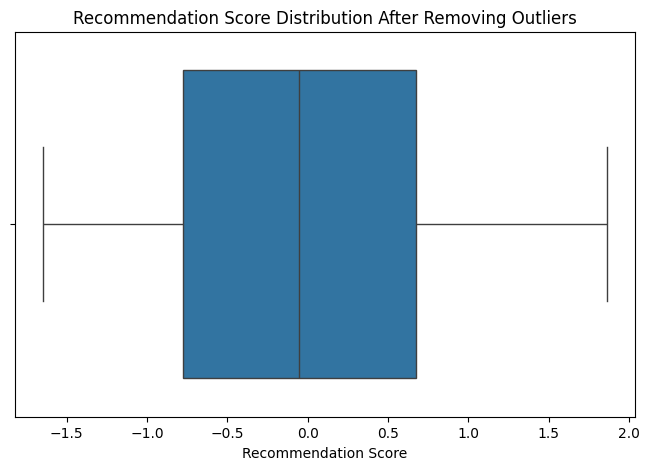

In [14]:
# Visualizing Outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=customer_survey_df["Recommendation Score"])
plt.title("Recommendation Score Distribution After Removing Outliers")
plt.show()